In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np
import time
import shap

c:\Users\4sell\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [65]:
path_raw = 'C:\\Users\\4sell\\Desktop\\'

# Leer el archivo Excel y guardar el contenido en un DataFrame
train = pd.read_excel(f'{path_raw}train.xlsx')

In [66]:
y = train.PRODUCTO_1
X = train.drop('PRODUCTO_1', axis=1)

Ahora entrenamos todos los modelos que queramos variando hiperparámetros y se guardan sus scores. Los hiperparámetros que mejores scores den se usan para reentrenar el modelo con el dataset entero, medir el tiempo de ejecución y guardarlo

In [14]:
metrics = {}
for n_estimators in [5, 10, 25, 50, 100, 250, 500, 1000]:
    for max_depth in [2, 3, 5, 7, 10]:
        model = RandomForestRegressor(n_estimators = n_estimators, max_depth=max_depth, random_state=73)
        rmse_scores = - cross_val_score(model, X, y, scoring='neg_root_mean_squared_error')

        metrics[f'rf_{n_estimators}_{max_depth}'] = {
            'RMSE_1': rmse_scores[0],
            'RMSE_2': rmse_scores[1],
            'RMSE_3': rmse_scores[2],
            'RMSE_4': rmse_scores[3],
            'RMSE_5': rmse_scores[4],
            'MEAN_RMSE': rmse_scores.mean()
        }

metrics_rf = pd.DataFrame.from_dict(metrics, orient='index',columns=['RMSE_1', 'RMSE_2', 'RMSE_3', 'RMSE_4', 'RMSE_5', 'MEAN_RMSE'])
metrics_rf.sort_values(by='MEAN_RMSE')

,RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,MEAN_RMSE
rf_500_3,225.184304,262.377970,321.569337,346.217636,253.836963,281.837242
rf_500_10,226.187245,263.245937,320.192933,346.321699,253.999331,281.989429
rf_500_5,226.235920,262.727778,320.333255,345.790813,255.520140,282.121581
rf_500_7,226.223884,263.386807,319.862839,346.616570,254.531472,282.124315
rf_1000_3,226.603976,262.734379,321.826268,345.056907,256.037359,282.451778
rf_500_2,226.620172,261.109919,322.726006,346.386032,255.663046,282.501035
rf_1000_2,227.518253,261.158163,322.962567,345.585063,255.943335,282.633476
rf_1000_7,227.087047,263.588160,321.068876,345.465292,256.101789,282.662233
rf_1000_10,227.161061,263.619459,321.268224,345.483074,256.103925,282.727149
rf_1000_5,227.566942,263.286963,321.666425,344.783789,256.816299,282.824084


Guardamos esta tablita

In [15]:
metrics_rf.to_csv('../06_model_output/metrics/random_forest.csv')

Reentrenamos el modelo con todos los datos, lo guardamos, y guardamos el RMSE que obtenemos sobre el propio train y el tiempo de computación

In [10]:
time1 = time.time()
rf = RandomForestRegressor(n_estimators=500, max_depth=3, random_state=73).fit(X, y)
time2 = time.time() - time1
preds = rf.predict(X)
rmse = root_mean_squared_error(y, preds)
rmse

186.62988711721567

In [16]:
preds = rf.predict(X)
comparacion = pd.DataFrame({'Real': y, 'Predicho': preds})
# Calcular la diferencia absoluta entre el valor real y el predicho
comparacion['Diferencia'] = np.abs(comparacion['Real'] - comparacion['Predicho'])

# Ordenar por la diferencia en orden descendente
comparacion_mayor_diferencia = comparacion.sort_values(by='Diferencia', ascending=False)

# Mostrar las 15 filas con mayores diferencias
print(comparacion_mayor_diferencia.head(15))

         Real     Predicho  Diferencia
110   526.400  1190.158547  663.758547
83    969.888  1423.845533  453.957533
61   1096.584  1529.437373  432.853373
51   2151.536  1727.630671  423.905329
103  1116.640  1498.049469  381.409469
92   1198.160  1571.184508  373.024508
78   2112.984  1745.245216  367.738784
139  1324.560  1672.134694  347.574694
100  2395.360  2058.363631  336.996369
94   2338.560  2002.276769  336.283231
20   2129.920  1793.971986  335.948014
143  1101.040  1432.635247  331.595247
140   970.800  1297.144301  326.344301
97   2117.760  1794.189760  323.570240
69    988.096  1303.286092  315.190092


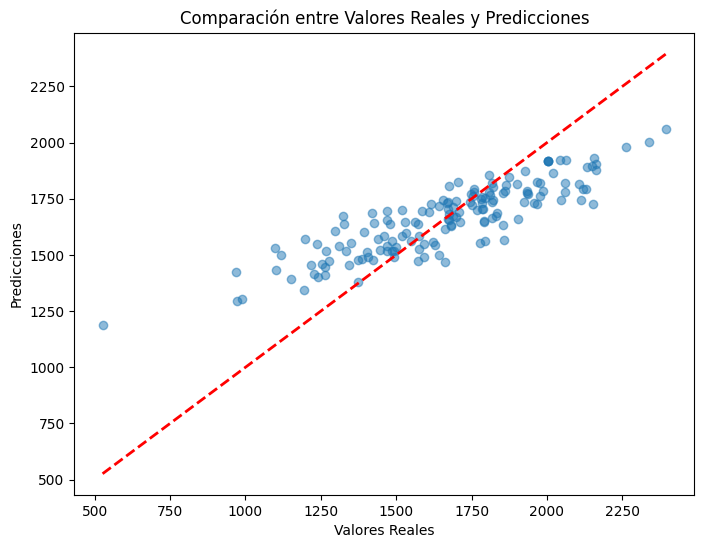

In [15]:
import matplotlib.pyplot as plt

# Gráfico de dispersión para comparar los valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y, preds, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.show()


In [5]:
dump(rf, '../06_model_output/models/random_forest.joblib')

['../06_model_output/models/random_forest.joblib']

In [6]:
with open('../06_model_output/metrics/final_metrics.txt', 'a') as f:
    f.write(f'\nRF, {time2}, {rmse}')

## RANDOM FOREST SELLÉS

In [17]:
metrics = {}
for n_estimators in [5, 10, 25, 50, 100, 250, 500, 1000]:
    for max_depth in [2, 3, 5, 7, 10]:
        model = RandomForestRegressor(n_estimators = n_estimators, max_depth=max_depth, random_state=73)
        rmse_scores = - cross_val_score(model, X, y, scoring='neg_root_mean_squared_error')

        metrics[f'rf_{n_estimators}_{max_depth}'] = {
            'RMSE_1': rmse_scores[0],
            'RMSE_2': rmse_scores[1],
            'RMSE_3': rmse_scores[2],
            'RMSE_4': rmse_scores[3],
            'RMSE_5': rmse_scores[4],
            'MEAN_RMSE': rmse_scores.mean()
        }

metrics_rf = pd.DataFrame.from_dict(metrics, orient='index',columns=['RMSE_1', 'RMSE_2', 'RMSE_3', 'RMSE_4', 'RMSE_5', 'MEAN_RMSE'])
metrics_rf.sort_values(by='MEAN_RMSE')

KeyboardInterrupt: 

In [18]:
#1er MÉTODO DE BÚSQUEDA

# Diccionario para almacenar los resultados
metrics = {}

# Bucle sobre diferentes valores de hiperparámetros
for n_estimators in [5, 10, 25, 50, 100, 250, 500, 1000]:
    for max_depth in [2, 3, 5, 7, 10, 12]:
        # Definir el modelo XGBoost con los hiperparámetros actuales
        model = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=73, objective='reg:squarederror')

        # Realizar cross-validation y obtener los scores del RMSE
        rmse_scores = -cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)

        # Almacenar los resultados en el diccionario
        metrics[f'xgb_{n_estimators}_{max_depth}'] = {
            'RMSE_1': rmse_scores[0],
            'RMSE_2': rmse_scores[1],
            'RMSE_3': rmse_scores[2],
            'RMSE_4': rmse_scores[3],
            'RMSE_5': rmse_scores[4],
            'MEAN_RMSE': rmse_scores.mean()
        }

# Convertir el diccionario en un DataFrame para visualizar los resultados
metrics_xgb = pd.DataFrame.from_dict(metrics, orient='index', columns=['RMSE_1', 'RMSE_2', 'RMSE_3', 'RMSE_4', 'RMSE_5', 'MEAN_RMSE'])

# Ordenar por la media del RMSE para ver los mejores resultados
metrics_xgb = metrics_xgb.sort_values(by='MEAN_RMSE')

# Mostrar el DataFrame resultante
print(metrics_xgb)


                 RMSE_1      RMSE_2      RMSE_3      RMSE_4      RMSE_5  \
xgb_5_2      205.299346  236.981734  321.307783  356.199920  285.081452   
xgb_5_12     244.706675  259.263958  311.666291  341.161192  265.771752   
xgb_5_10     244.706675  259.263958  311.666291  341.161192  266.461208   
xgb_5_3      251.500927  237.949943  333.359440  351.500130  254.467487   
xgb_10_3     246.712142  241.316846  332.651587  354.261720  255.007188   
xgb_5_7      243.800138  261.643280  320.665776  338.816593  269.779522   
xgb_500_10   239.966569  259.298426  329.045831  340.735234  266.153832   
xgb_250_10   239.966569  259.298426  329.045831  340.735234  266.153832   
xgb_100_10   239.966569  259.298426  329.045831  340.735234  266.153832   
xgb_1000_10  239.966569  259.298426  329.045831  340.735234  266.153832   
xgb_50_10    239.968310  259.297016  329.045481  340.736402  266.156441   
xgb_25_10    240.196769  259.023480  329.139167  340.865222  266.531776   
xgb_10_10    239.308970  

In [67]:
#2º MÉTODO DE BÚSQUEDA

# Definir el espacio de búsqueda de hiperparámetros
param_distribs = {
    'n_estimators': [100, 200, 500, 1000],  # Número de árboles
    'max_depth': [3, 5, 7, 10],  # Profundidad de los árboles
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Tasa de aprendizaje
    'subsample': [0.6, 0.8, 1.0],  # Proporción de muestras usadas en cada árbol
    'colsample_bytree': [0.6, 0.8, 1.0],  # Proporción de características usadas por árbol
}

# Definir el modelo base
model = xgb.XGBRegressor(random_state=73, objective='reg:squarederror')

# Definir el RandomizedSearchCV
rnd_search = RandomizedSearchCV(model, 
                                param_distributions=param_distribs, 
                                n_iter=20,  # Probar 20 combinaciones aleatorias
                                scoring='neg_root_mean_squared_error',  # Usar RMSE como métrica
                                cv=5,  # Validación cruzada con 5 pliegues
                                random_state=73, 
                                n_jobs=-1  # Usar todos los núcleos
                               )

# Ajustar el modelo
rnd_search.fit(X, y)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", rnd_search.best_params_)

# Mostrar el mejor resultado (RMSE)
print("Mejor RMSE:", -rnd_search.best_score_)


KeyboardInterrupt: 

In [68]:
#TOMAMOS EL MODELO CON LOS MEJORES HIPERPARÁMETROS


# Medir el tiempo de entrenamiento
time1 = time.time()

# Inicializa el modelo
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=10,
    subsample=0.8,
    learning_rate=0.1,
    colsample_bytree=0.8,
    random_state=73
)

# Realiza la validación cruzada
# Hacemos uso de make_scorer para que se ajuste a RMSE
rmse_scores = -cross_val_score(xgb_model, X, y, scoring='neg_root_mean_squared_error', cv=5)

# Muestra los resultados
print(f'RMSE Scores de cada pliegue: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean():.2f}')

RMSE Scores de cada pliegue: [247.33596942 239.56551938 335.36235735 342.30995483 255.60622063]
Mean RMSE: 284.04


In [69]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Ajusta el modelo con todo el conjunto de datos
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)
comparacion = pd.DataFrame({'Real': y_test, 'Predicho': preds})
# Calcular la diferencia absoluta entre el valor real y el predicho
comparacion['Diferencia'] = np.abs(comparacion['Real'] - comparacion['Predicho'])

# Ordenar por la diferencia en orden descendente
comparacion_mayor_diferencia = comparacion.sort_values(by='Diferencia', ascending=False)

# Mostrar las 15 filas con mayores diferencias
print(comparacion_mayor_diferencia.head(15))

         Real     Predicho  Diferencia
51   2151.536  1430.505249  721.030751
153  1857.280  1397.526978  459.753022
72   1470.240  1916.799805  446.559805
62   2150.576  1734.369385  416.206615
143  1101.040  1486.317993  385.277993
5    2161.120  1814.603760  346.516240
108  1937.680  1599.728149  337.951851
41   1977.520  1688.081665  289.438335
136  1935.280  1658.519775  276.760225
46   2162.480  1891.220337  271.259663
67   1792.072  1528.061890  264.010110
55   1262.928  1526.563232  263.635232
120  1806.960  1630.447021  176.512979
23   1240.704  1099.209106  141.494894
145  1783.840  1656.581421  127.258579


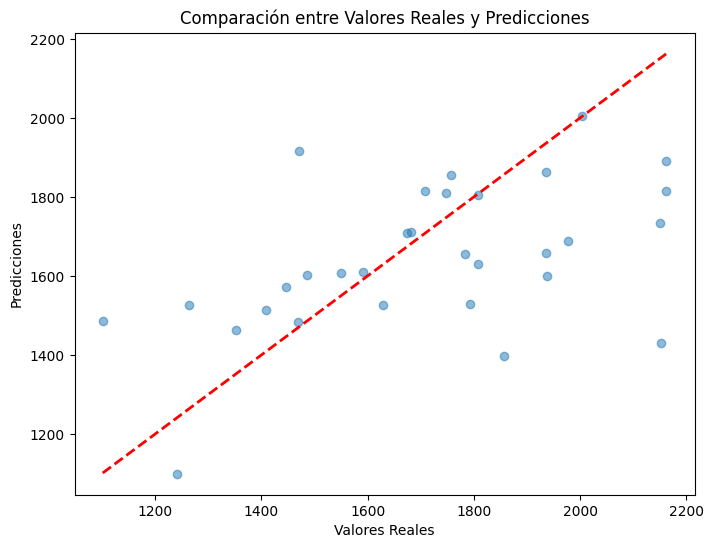

In [70]:
# Gráfico de dispersión para comparar los valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.show()

Elimino Outliers

In [71]:
# 1. Calcular los percentiles 5 y 95
lower_bound = train['PRODUCTO_1'].quantile(0.05)
upper_bound = train['PRODUCTO_1'].quantile(0.95)

# 2. Filtrar el DataFrame
train_filtered = train[(train['PRODUCTO_1'] >= lower_bound) & (train['PRODUCTO_1'] <= upper_bound)]

y = train_filtered.PRODUCTO_1
X = train_filtered.drop('PRODUCTO_1', axis=1)

In [72]:
#2º MÉTODO DE BÚSQUEDA

# Definir el espacio de búsqueda de hiperparámetros
param_distribs = {
    'n_estimators': [100, 200, 500, 1000],  # Número de árboles
    'max_depth': [3, 5, 7, 10],  # Profundidad de los árboles
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Tasa de aprendizaje
    'subsample': [0.6, 0.8, 1.0],  # Proporción de muestras usadas en cada árbol
    'colsample_bytree': [0.6, 0.8, 1.0],  # Proporción de características usadas por árbol
}

# Definir el modelo base
model = xgb.XGBRegressor(random_state=73, objective='reg:squarederror')

# Definir el RandomizedSearchCV
rnd_search = RandomizedSearchCV(model, 
                                param_distributions=param_distribs, 
                                n_iter=20,  # Probar 20 combinaciones aleatorias
                                scoring='neg_root_mean_squared_error',  # Usar RMSE como métrica
                                cv=5,  # Validación cruzada con 5 pliegues
                                random_state=73, 
                                n_jobs=-1  # Usar todos los núcleos
                               )

# Ajustar el modelo
rnd_search.fit(X, y)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", rnd_search.best_params_)

# Mostrar el mejor resultado (RMSE)
print("Mejor RMSE:", -rnd_search.best_score_)


Mejores hiperparámetros encontrados: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Mejor RMSE: 226.83124232994479


In [73]:
#TOMAMOS EL MODELO CON LOS MEJORES HIPERPARÁMETROS


# Medir el tiempo de entrenamiento
time1 = time.time()

# Inicializa el modelo
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=10,
    subsample=0.8,
    learning_rate=0.01,
    colsample_bytree=1,
    random_state=73
)

# Realiza la validación cruzada
# Hacemos uso de make_scorer para que se ajuste a RMSE
rmse_scores = -cross_val_score(xgb_model, X, y, scoring='neg_root_mean_squared_error', cv=5)

# Muestra los resultados
print(f'RMSE Scores de cada pliegue: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean():.2f}')

RMSE Scores de cada pliegue: [211.64978647 214.034471   251.27667141 249.16318029 208.03210248]
Mean RMSE: 226.83


In [76]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Ajusta el modelo con todo el conjunto de datos
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)
comparacion = pd.DataFrame({'Real': y_test, 'Predicho': preds})
# Calcular la diferencia absoluta entre el valor real y el predicho
comparacion['Diferencia'] = np.abs(comparacion['Real'] - comparacion['Predicho'])

# Ordenar por la diferencia en orden descendente
comparacion_mayor_diferencia = comparacion.sort_values(by='Diferencia', ascending=False)

# Mostrar las 15 filas con mayores diferencias
print(comparacion_mayor_diferencia.head(15))

         Real     Predicho  Diferencia
88   1325.280  1735.091553  409.811553
139  1324.560  1724.569580  400.009580
80   1351.592  1704.477661  352.885661
75   1332.296  1637.936768  305.640768
72   1470.240  1768.375000  298.135000
52   1470.528  1748.536743  278.008743
10   2063.680  1818.419800  245.260200
150  1342.800  1587.138062  244.338062
66   1439.848  1667.611206  227.763206
113  1385.600  1592.162598  206.562598
45   1853.280  1659.428345  193.851655
84   1957.144  1767.085449  190.058551
8    1407.680  1559.786011  152.106011
106  1899.600  1751.703735  147.896265
4    1861.840  1717.670166  144.169834


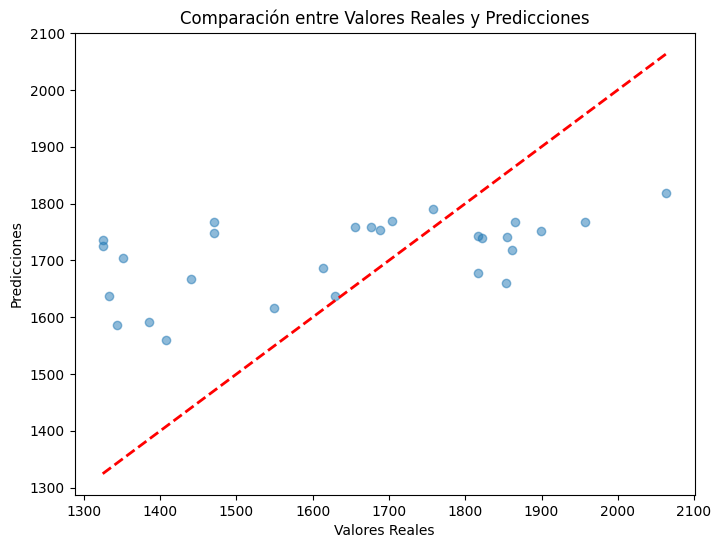

In [77]:
# Gráfico de dispersión para comparar los valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.show()

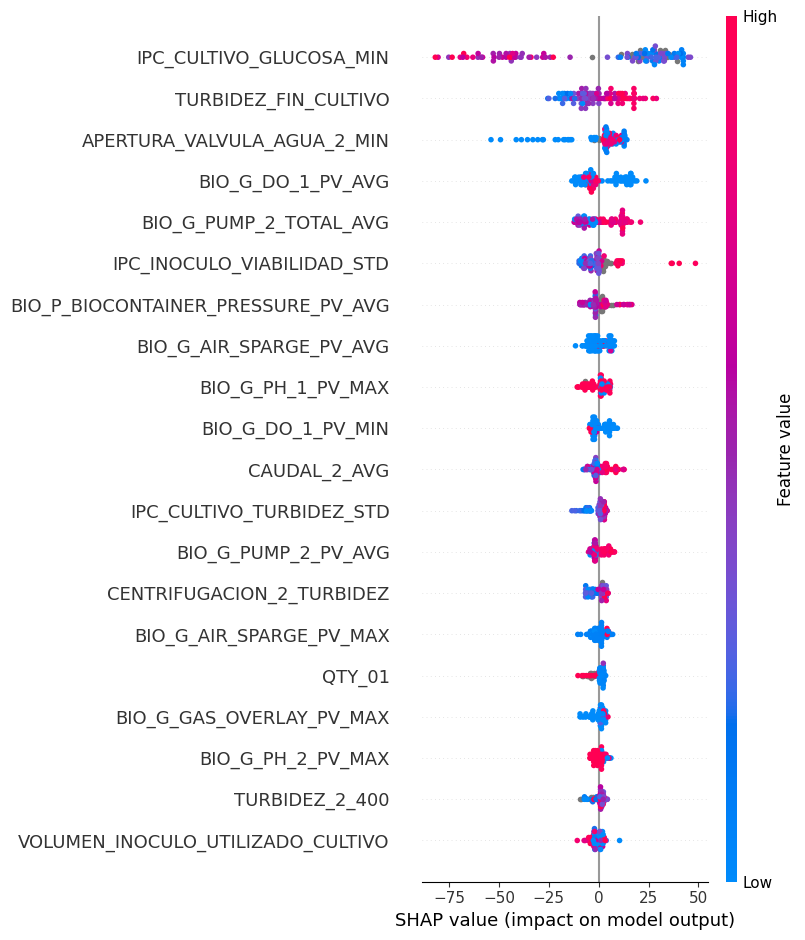

In [88]:
# Calcular SHAP values

explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_rf(X_train)

# Reshape de los base values si es necesario
shap_values_xgb.base_values = shap_values_xgb.base_values.reshape(-1)

# Resumen de SHAP values
shap.summary_plot(shap_values_xgb, X_train, feature_names=X_train.columns)


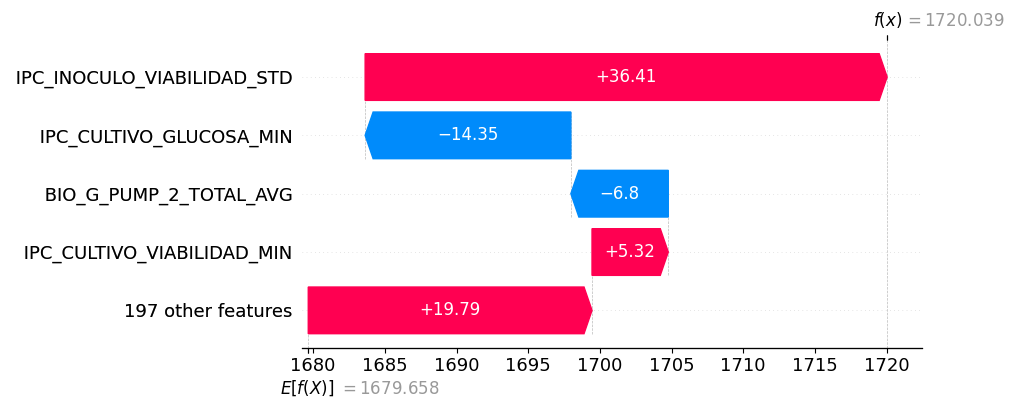

In [89]:
# Visualización del gráfico de tipo "waterfall" para un individuo específico
individual = 5  # Cambia este índice según el individuo que desees visualizar

shap.plots._waterfall.waterfall_legacy(
    explainer_xgb.expected_value[0],
    shap_values_xgb[individual].values,
    X_train.values[individual],
    feature_names=X_train.columns,
    max_display=5)

Base feature: VOLUMEN_INOCULO_UTILIZADO_CULTIVO


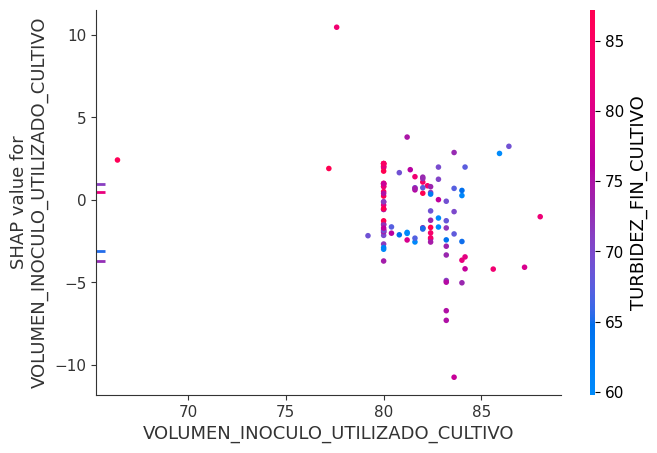

In [93]:
# Definir la característica que deseas analizar
feature = 1  # Cambia este índice según la característica que desees visualizar
feat = X_train.columns[feature]  # Asegúrate de que estás usando los nombres de las columnas correctos

print(f"Base feature: {feat}")

# Gráfico de dependencia de SHAP
shap.dependence_plot(
    ind=feat,
    shap_values=shap_values_xgb.values,
    features=X_train,
    interaction_index='auto'
)